# OpenCV Image Translation
* Translation의 의미 - X축과 Y축을 따라 이미지를 이동시키는 행위를 말함
* 절차
  - 이미지로드
  - 아핀변환행렬 정의
  - cv2.warpAffine()메소드 사용

### 이미지의 이동, 크기조정, 회전관련 패키지 설치
* [깃헙 참조](https://github.com/jrosebr1/imutils)

In [ ]:
!pip install imutils

### 이미지 다운로드

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-translate/opencv-translate.zip
!unzip -qq opencv-translate.zip
%cd opencv-translate

--2021-04-21 06:40:46--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-translate/opencv-translate.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.183.162
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.183.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34437 (34K) [application/zip]
Saving to: ‘opencv-translate.zip’

opencv-translate.zi 100%[===================>]  33.63K  --.-KB/s    in 0.04s   

2021-04-21 06:40:46 (856 KB/s) - ‘opencv-translate.zip’ saved [34437/34437]

/content/opencv-translate


### 패키지 임포트

In [32]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

### Affin Translation Matrix

In [ ]:
from IPython.display import Image

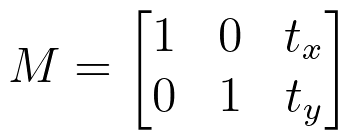

In [ ]:
Image('/content/sample_data/opencv_translate_matrix.png')

* $ t_x $ 가 음수이면 이미지는 좌측으로 이동
* $ t_x $ 가 양수이면 이미지는 우측으로 이동
* $ t_y $ 가 음수이면 이미지는 위쪽으로 이동
* $ t_y $ 가 양수이면 이미지는 아래로 이동

In [14]:
help(cv2.warpAffine)

Help on built-in function warpAffine:

warpAffine(...)
    warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
    .   @brief Applies an affine transformation to an image.
    .   
    .   The function warpAffine transforms the source image using the specified matrix:
    .   
    .   \f[\texttt{dst} (x,y) =  \texttt{src} ( \texttt{M} _{11} x +  \texttt{M} _{12} y +  \texttt{M} _{13}, \texttt{M} _{21} x +  \texttt{M} _{22} y +  \texttt{M} _{23})\f]
    .   
    .   when the flag #WARP_INVERSE_MAP is set. Otherwise, the transformation is first inverted
    .   with #invertAffineTransform and then put in the formula above instead of M. The function cannot
    .   operate in-place.
    .   
    .   @param src input image.
    .   @param dst output image that has the size dsize and the same type as src .
    .   @param M \f$2\times 3\f$ transformation matrix.
    .   @param dsize size of the output image.
    .   @param flags combination of interpolation methods (

### 코드 수행 

In [15]:
def plt_imshow(title, image):
  """
  이미지프레임을 BGR에서 RGB로 변환 후 이미지 표출
  """
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.title(title)
  plt.imshow(image)
  plt.grid(False);plt.show()

In [16]:
args = {
    "image":"opencv_logo.png"
}

50.0

(554, 450, 3)

numpy.ndarray

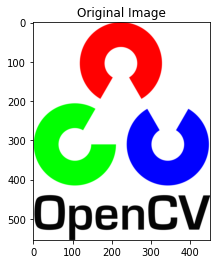

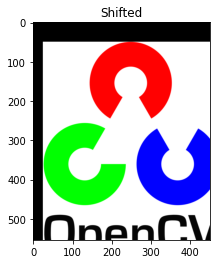

In [41]:
# 이미지를 오른쪽으로 25픽셀
# 아래로 50픽셀 이동
M = np.float32([
  [1, 0, 25],
	[0, 1, 50]])
display(M.shape, M[1][2])   
# Affin Translation Matrix적용
image = cv2.imread(args['image'])
display(image.shape, type(image)) # (554, 450, 3) , numpy.ndarray
plt_imshow("Original Image", image)

# 실제 이동(translation)이 발생
# image.shape[0] - height, image.shape[1] - width
# 오른쪽으로 25픽셀이동, 아래로 50픽셀 이동
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted", shifted)

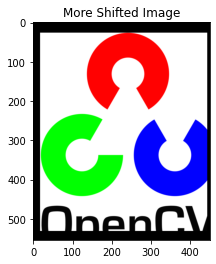

In [23]:
# 이미지를 좌측으로 이동(7만큼), 
# 좌측으로 7픽셀 이동
# 위로 23픽셀 이동
M = np.float32([
	[1, 0, -7],
	[0, 1, -23]
])
more_shift = cv2.warpAffine(shifted, M, (image.shape[1], image.shape[0])) # x - width, y - height
plt_imshow("More Shifted Image", more_shift)

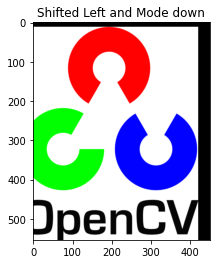

In [24]:
# 좌측으로 30픽셀이동
# 아래로 12픽셀 이동
shiftX, shiftY = -30, 12
M = np.float32([[1, 0, shiftX],  
                [0, 1, shiftY]])

more_shift = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Left and Mode down", more_shift)

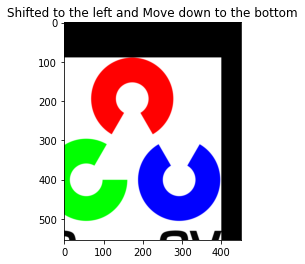

In [25]:
# Shifted to the left and Move down to the bottom
M = np.float32([[1, 0 , -50], [0, 1, 90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted to the left and Move down to the bottom", shifted)

* 위의 방법은 이미지의 이동위치를 지정해주고, 매뉴얼하게 해당 API를 직접 호출하는 방법이지만 다음과 같은 방법도 한번 보자 

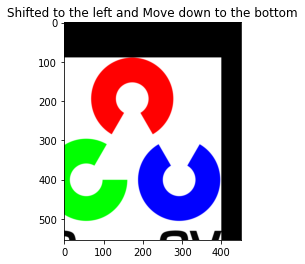

In [30]:
# Shifted to the left and Move down to the bottom
shifted = imutils.translate(image, -50, 90)
plt_imshow("Shifted to the left and Move down to the bottom", shifted)

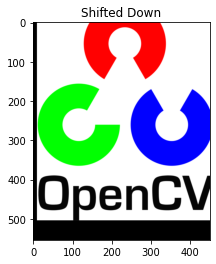

In [ ]:
shifted = imutils.translate(image,10, -50)  # width, height
plt_imshow("Shifted Down", shifted)

### OpenCV를 이용한 이미지 이동

In [33]:
# 파이썬 쉘환경에서 파이썬 스크립트 수행
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", type=str, default="opencv_logo.png",
#	help="path to the input image")
#args = vars(ap.parse_args())

# 쥬피터 및 코랩에서 수행하므로 위 부분 주석 처리 
args = {
	"image": "opencv_logo.png"
}

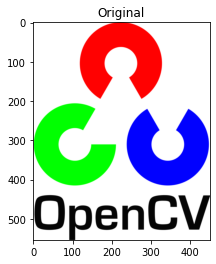

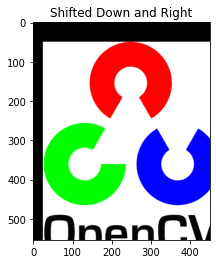

In [34]:
# load the image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# shift the image 25 pixels to the right
# 50 pixels Move down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Down and Right", shifted)

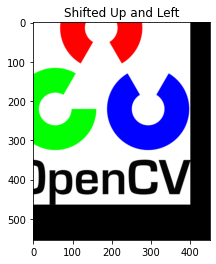

In [35]:
# 50픽셀만큼 왼쪽 이동시키고(width), 90픽셀만큼 위로 이동(height)
# up by specifying negative values for the x and y directions,
# respectively
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
plt_imshow("Shifted Up and Left", shifted)

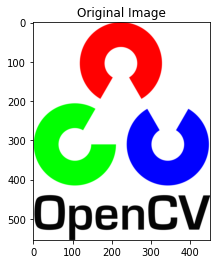

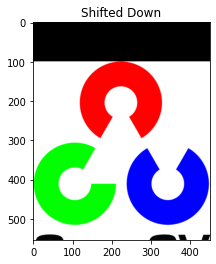

In [39]:
# 아래로 100픽셀이동
#현재 이미지
plt_imshow("Original Image", image)

# 이동 이미지
shifted = imutils.translate(image, 0, 100)
plt_imshow("Shifted Down", shifted)

### 정리
* [imutils.translate](https://github.com/jrosebr1/imutils/blob/master/imutils/convenience.py#L17)
* 이미지 이동의 방법은 두가지 방법을 이용해 적용 가능
  - 1)이미지 로드 ->  `warpAffine()` 정의
  - 2)`imutils.translate()` 함수 사용